In [41]:
%pylab inline
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [42]:
house = pd.read_csv('housing.csv')

In [43]:
house.shape

(20640, 10)

In [44]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [45]:
X = house.drop('median_house_value', axis=1)
y = house.median_house_value

In [46]:
le = LabelEncoder()

In [47]:
house['ocean_proximity'] = le.fit_transform(house['ocean_proximity'])

In [48]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [49]:
house['total_bedrooms'] = house['total_bedrooms'].fillna(house['total_bedrooms'].mean())

In [50]:
house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [51]:
X = house.drop('median_house_value', axis=1)
y = house.median_house_value

In [52]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
lin =LinearRegression()

In [54]:
lin.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
predictions = lin.predict(xtest)
print(math.sqrt(mean_squared_error(ytest, predictions)))

71098.69982050016


In [56]:
ypredicted=lin.predict(xtrain)
r2_score(ytrain,ypredicted)

0.6401079709888613

In [57]:
lin.score(xtest,ytest)

0.6142406531011806

In [58]:
dtree_reg = DecisionTreeRegressor(max_depth=10)

In [59]:
dtree_reg.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [60]:
pred = dtree_reg.predict(xtest)
print(math.sqrt(mean_squared_error(ytest, pred)))

61696.020684487026


In [61]:
ypredicted=dtree_reg.predict(xtrain)
r2_score(ytrain,ypredicted)

0.8442778401445059

In [62]:
dtree_reg.score(xtest,ytest)

0.7095258784467136

In [63]:
ran = RandomForestRegressor(max_depth=10)

In [64]:
ran.fit(xtrain, ytrain)

c:\users\jagadeesh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
predict = ran.predict(xtest)
print(math.sqrt(mean_squared_error(ytest, predict)))

54890.22856674602


In [66]:
ypredicted=ran.predict(xtrain)
r2_score(ytrain,ypredicted)

0.8607382347791679

In [67]:
ran.score(xtest,ytest)

0.7700765759286688

In [76]:
dropcolumns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','ocean_proximity']
income=X.drop(dropcolumns,axis=1)

In [77]:
xtrain1,xtest1,ytrain1,ytest1=model_selection.train_test_split(income,y,test_size=0.2,random_state=42)

In [78]:
lin =LinearRegression()
lin.fit(xtrain1,ytrain1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
ypre1=lin.predict(xtest1)
print(ypre1[0:3])
print(ytest1[0:3])
print(ytrain1[0:3])

[114958.91676996 150606.88213964 190393.71844449]
20046     47700
3024      45800
15663    500001
Name: median_house_value, dtype: int64
14196    103000
8267     382100
17445    172600
Name: median_house_value, dtype: int64


Text(0, 0.5, 'median_house_value')

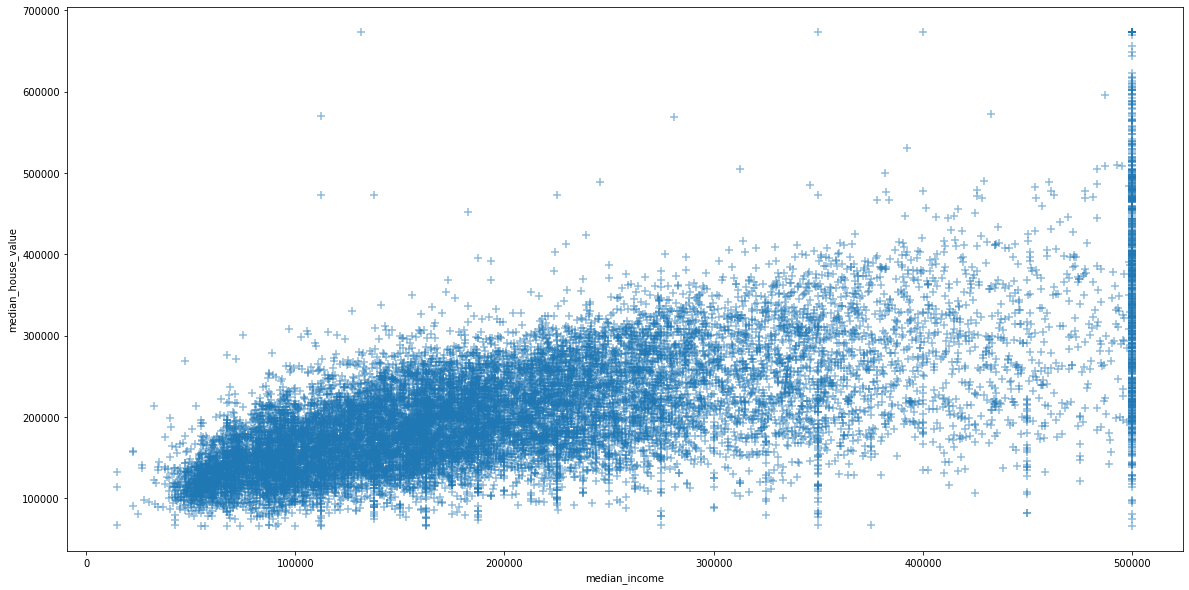

In [84]:
fig=figure(figsize=(20,10))
plt.scatter(ytrain1,lin.predict(xtrain1),marker="+",s=50,alpha=0.5)
plt.xlabel("median_income")
plt.ylabel("median_house_value")

Text(0, 0.5, 'median_house_value')

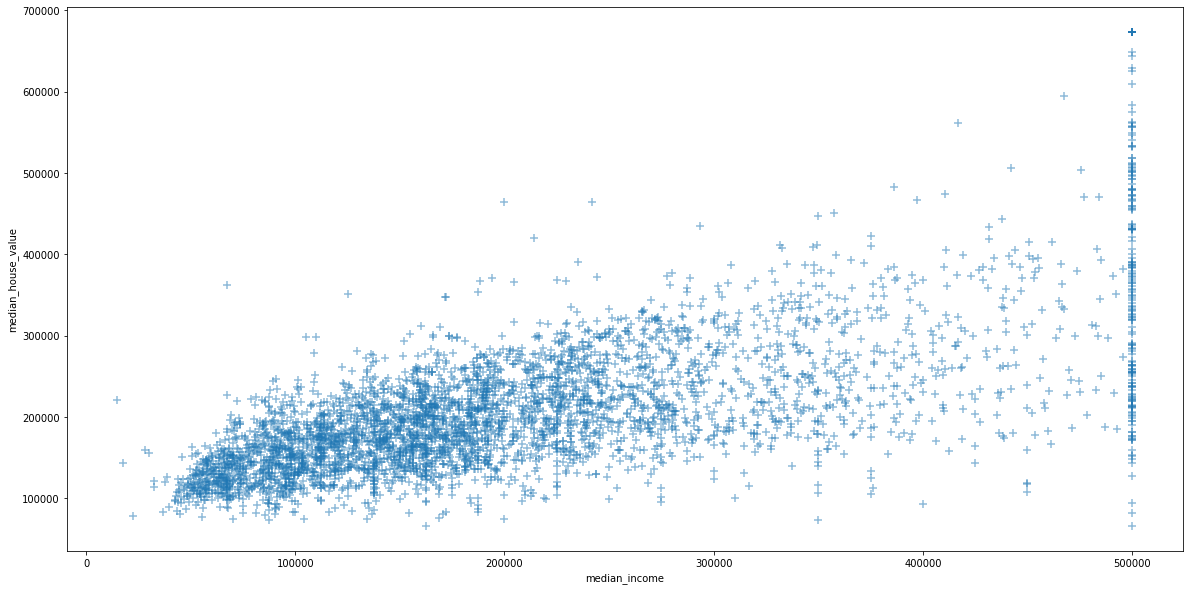

In [86]:
fig=figure(figsize=(20,10))
plt.scatter(ytest1,lin.predict(xtest1),marker="+",s=50,alpha=0.5)
plt.xlabel("median_income")
plt.ylabel("median_house_value")